In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# File path TAHMO station data (CSV format with columns:'Precipitation (mm)')
tahmo_root_dir = r'C:\Users\c.kwa\Desktop\meteosat_retrieval\data_downloads\TAHMO\TAHMO_export_6704eaa37e81da18c0b7e245'

In [4]:
station_name_list = []
station_data_list_TAHMO = []
for station in os.listdir(tahmo_root_dir): 
    if station.endswith('.csv'):
        station_file = os.path.join(tahmo_root_dir, station)
        station_data = pd.read_csv(station_file)
        station_name_list.append(station.split('.')[0])
        station_data_list_TAHMO.append(station_data)

sensors_meta_data_tahmo = station_data_list_TAHMO.pop(0)
stations_meta_data_tahmo = station_data_list_TAHMO.pop(0)
sensors_meta_data_tahmo_name = station_name_list.pop(0)
stations_meta_data_tahmo_name = station_name_list.pop(0)


station_data_tahmo_dict = dict(zip(station_name_list, station_data_list_TAHMO))

#Assuming df is the DataFrame containing the data
for station_name in station_data_tahmo_dict:
    if station_data_tahmo_dict[station_name].shape[1] == 3:
        station_data_tahmo_dict[station_name]['precipitation (mm)'] = station_data_tahmo_dict[station_name].iloc[:, 2].combine_first(station_data_tahmo_dict[station_name].iloc[:, 2])

        # Dropping the old columns (optional)
        station_data_tahmo_dict[station_name] = station_data_tahmo_dict[station_name].drop(station_data_tahmo_dict[station_name].columns[[1, 2]], axis = 1)

        # # Result
        # display(station_data_tahmo_dict[station_name].head())

    elif station_data_tahmo_dict[station_name].shape[1] == 4:
        station_data_tahmo_dict[station_name]['precipitation (mm)'] = station_data_tahmo_dict[station_name].iloc[:, 2].combine_first(station_data_tahmo_dict[station_name].iloc[:, 1]).combine_first(station_data_tahmo_dict[station_name].iloc[:, 3])
        # Dropping the old columns (optional)
        station_data_tahmo_dict[station_name] = station_data_tahmo_dict[station_name].drop(station_data_tahmo_dict[station_name].columns[[1, 2, 3]], axis = 1)


    if 'timestamp' in station_data_tahmo_dict[station_name].columns:
        # Set Timestamp as the index
        station_data_tahmo_dict[station_name]['timestamp'] = pd.to_datetime(station_data_tahmo_dict[station_name]['timestamp'])
        station_data_tahmo_dict[station_name] = station_data_tahmo_dict[station_name].set_index('timestamp')

    # Accumulate over 30 minutes
    station_data_tahmo_dict[station_name] = station_data_tahmo_dict[station_name].resample('30min').sum(min_count = 2)


In [5]:
# Initialize an empty DataFrame to hold all stations' data
combined_station_data = pd.DataFrame()

# Loop through the station_data_gmet_dict
for station_name, station_data in station_data_tahmo_dict.items():
    # Extract the precipitation data, rename the column to the station name
    station_precip = station_data[['precipitation (mm)']].rename(columns={'precipitation (mm)': station_name})
    # Merge into the combined DataFrame on the index (Timestamp)
    combined_station_data = pd.merge(
        combined_station_data, station_precip, left_index=True, right_index=True, how='outer'
    )
display(combined_station_data.loc['2022-12'])

,TA00005,TA00007,TA00010,TA00016,TA00045,TA00113,TA00116,TA00117,TA00118,TA00120,...,TA00266,TA00301,TA00302,TA00391,TA00392,TA00616,TA00647,TA00689,TA00690,TA00756
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-12-01 00:00:00,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000
2022-12-01 00:30:00,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000
2022-12-01 01:00:00,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000
2022-12-01 01:30:00,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000
2022-12-01 02:00:00,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 21:30:00,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000
2022-12-31 22:00:00,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000
2022-12-31 22:30:00,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000


In [6]:
df_pred = pd.read_csv('df_output_tahmo_2022.csv', index_col = 0, parse_dates = True)
df_pred[df_pred <= 0.02] = 0

df_target = pd.read_csv('df_target_tahmo_2022.csv', index_col = 0, parse_dates = True)
df_target[df_target <= 0.02] = 0

In [8]:
def hist_plot(df_satellite, df_station, df_target, station):
    # Resample data to monthly and compute the sum
    monthly_satellite = df_satellite.loc['2022'].resample('ME').sum()
    monthly_gauge = df_station.loc['2022'].resample('ME').sum()

    monthly_target = df_target.loc['2022'].resample('ME').sum()
    
    # # Create a new DataFrame to store the sums for each month
    # monthly_comparison = pd.DataFrame({
    #     'Satellite': monthly_satellite.sum(axis=1),
    #     'Gauge': monthly_gauge.sum(axis=1)
    # })
    
    # Group data by month name for the x-axis labels
    monthly_satellite['Month'] = monthly_satellite.index.strftime('%B')
    monthly_satellite_grouped = monthly_satellite.groupby('Month').sum()
    
    # Group data by month name for the x-axis labels
    monthly_gauge['Month'] = monthly_gauge.index.strftime('%B')
    monthly_gauge_grouped = monthly_gauge.groupby('Month').sum()

    # Group data by month name for the x-axis labels
    monthly_target['Month'] = monthly_target.index.strftime('%B')
    monthly_target_grouped = monthly_target.groupby('Month').sum()
    
    # Ensure months are in calendar order
    ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 
                      'July', 'August', 'September', 'October', 'November', 'December']
    
    monthly_satellite_grouped = monthly_satellite_grouped.reindex(ordered_months)
    monthly_gauge_grouped = monthly_gauge_grouped.reindex(ordered_months)
    monthly_target_grouped = monthly_target_grouped.reindex(ordered_months)


    # Plotting the histogram
    plt.figure(figsize=(12, 6))
    bar_width = 0.20
    x = range(len(monthly_satellite_grouped.index))
    plt.bar(x, monthly_satellite_grouped[station], width=bar_width, label='Satellite', alpha=0.7)
    plt.bar([i + bar_width for i in x], monthly_gauge_grouped[station], width=bar_width, label='Gauge', alpha=0.7)
    plt.bar([i + bar_width * 2 for i in x], monthly_target_grouped[station], width=bar_width, label='Target', alpha=0.7)
    
    # Customize the plot
    plt.xlabel('Month')
    plt.ylabel('Sum')
    plt.title(f'Monthly Sum Comparison: Satellite vs. Gauge {station}')
    plt.xticks([i + bar_width / 2 for i in x], monthly_satellite_grouped.index, rotation=45)
    plt.legend()
    plt.tight_layout()

    #plt.savefig(f'cumalitive_comparison2022_{station}.png')
    
    # Show the plot
    plt.show()

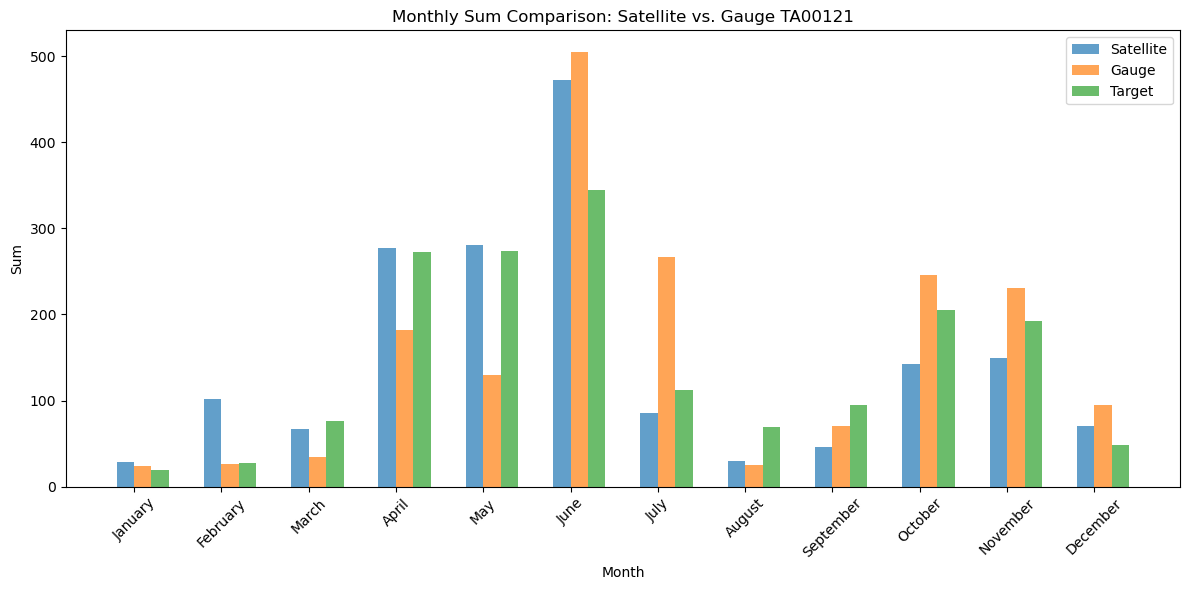

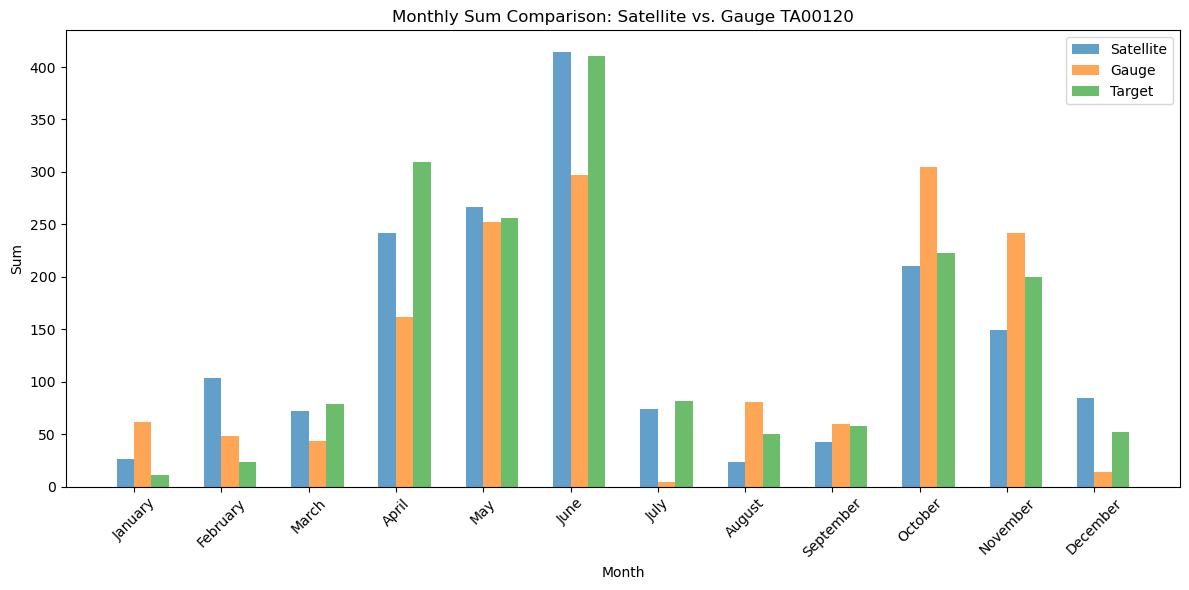

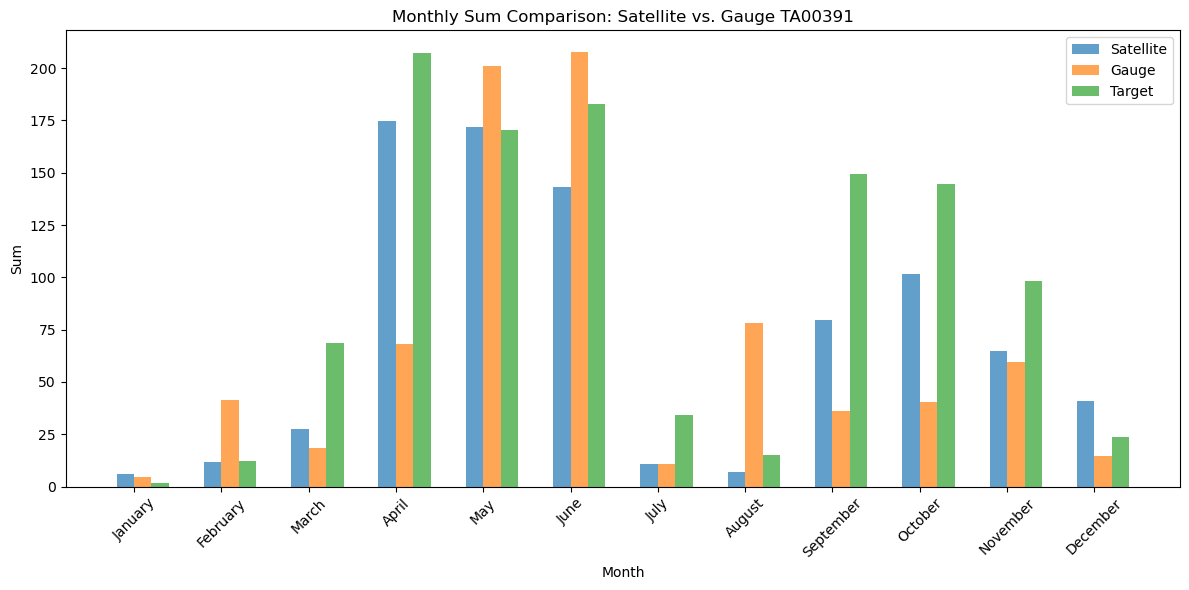

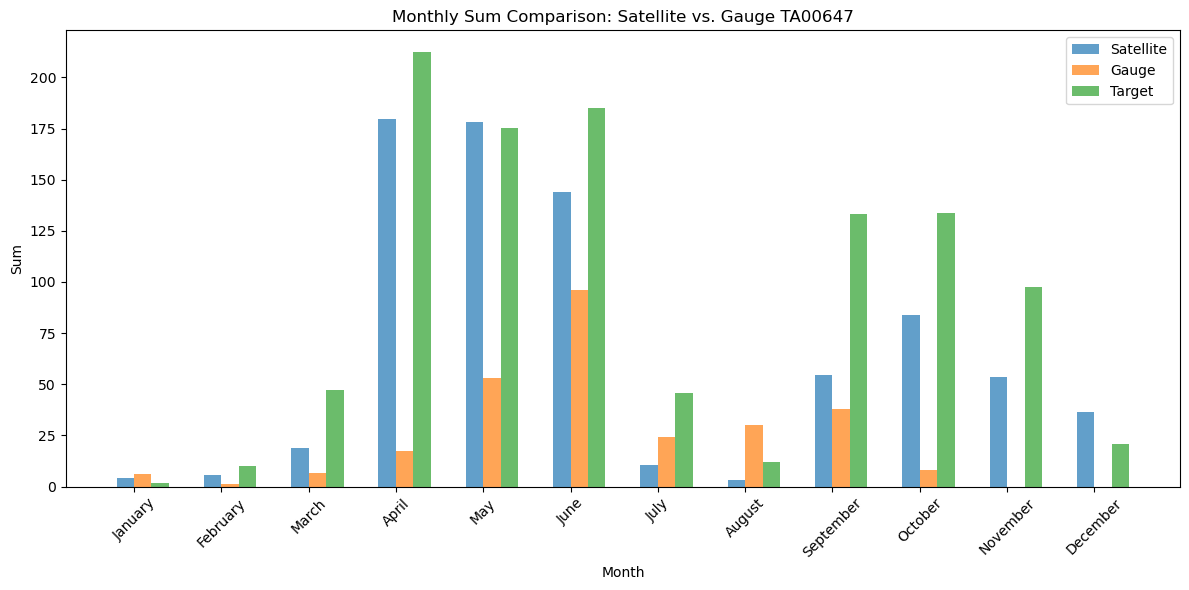

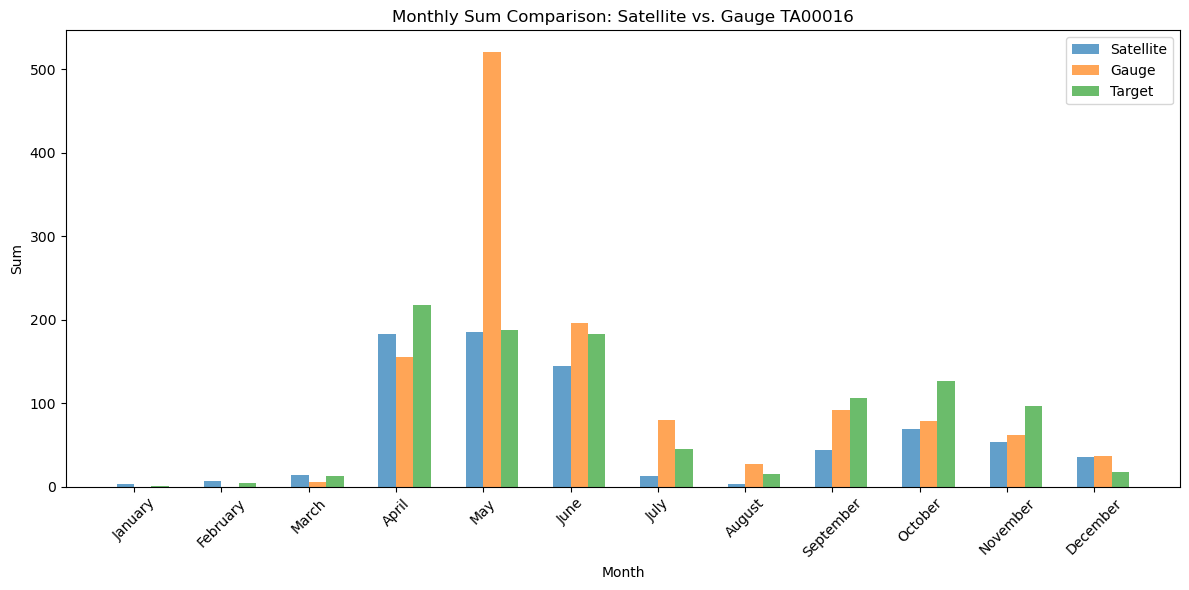

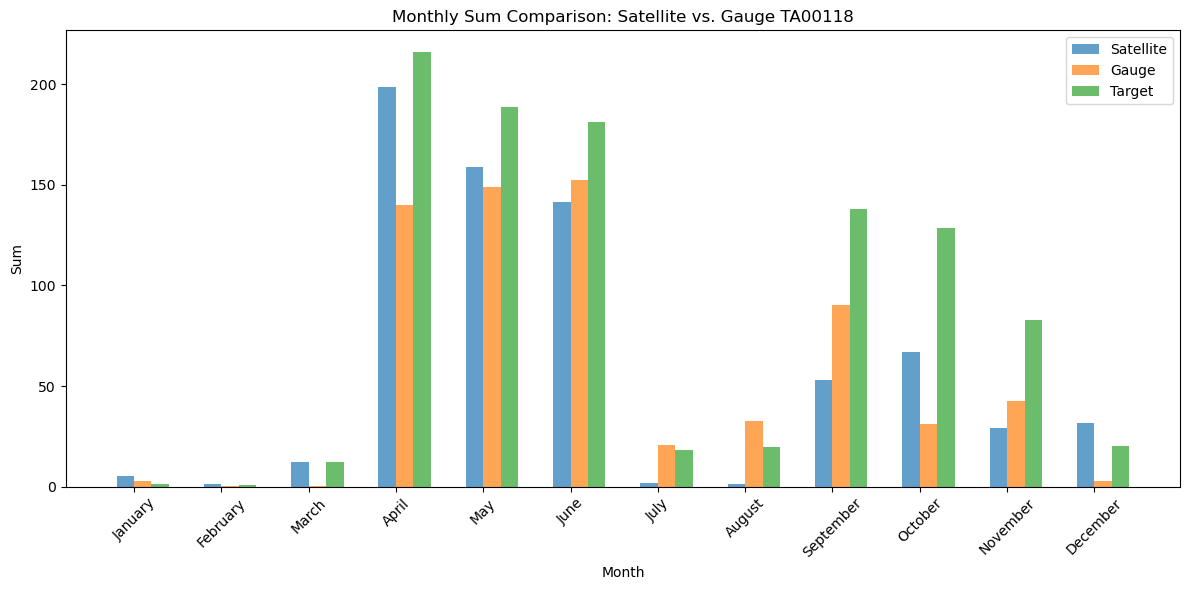

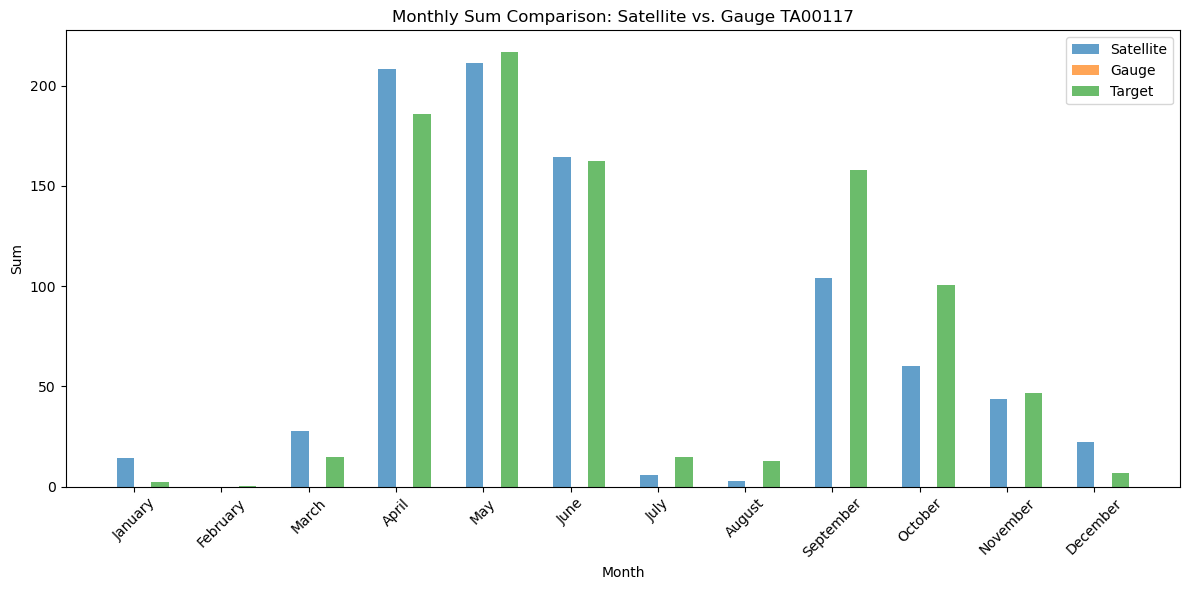

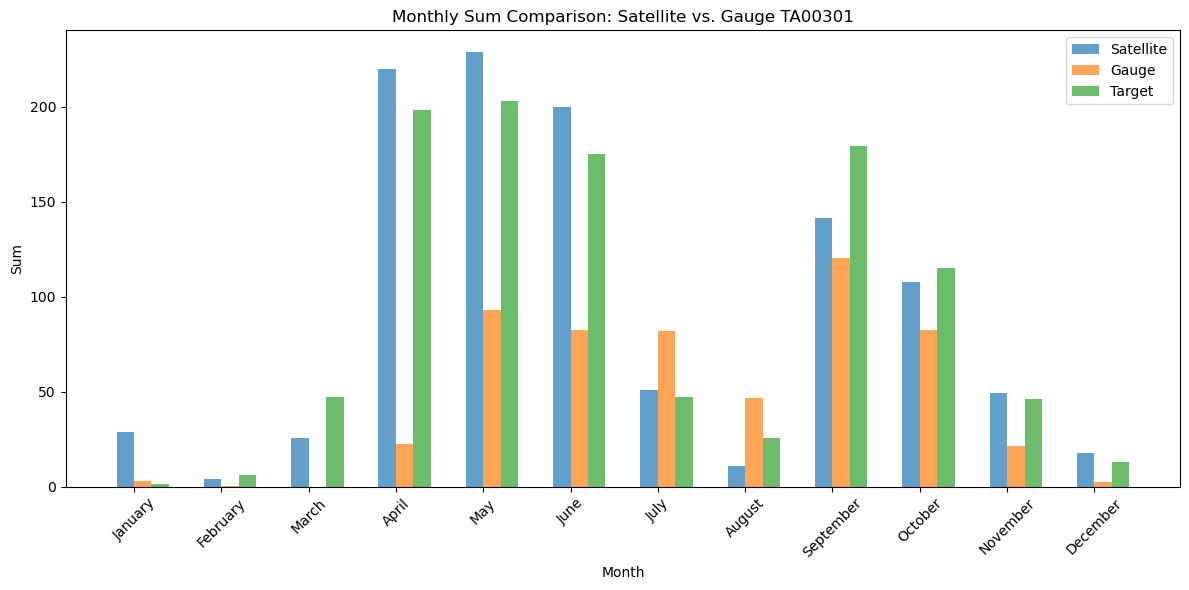

In [9]:
hist_plot(df_pred, combined_station_data, df_target, 'TA00121')
hist_plot(df_pred, combined_station_data, df_target, 'TA00120')
hist_plot(df_pred, combined_station_data, df_target, 'TA00391')
hist_plot(df_pred, combined_station_data, df_target, 'TA00647')
hist_plot(df_pred, combined_station_data, df_target, 'TA00016')
hist_plot(df_pred, combined_station_data, df_target, 'TA00118')
hist_plot(df_pred, combined_station_data, df_target, 'TA00117')
hist_plot(df_pred, combined_station_data, df_target, 'TA00301')
#hist_plot(df_pred, combined_station_data, df_target, 'Ada_Foah')

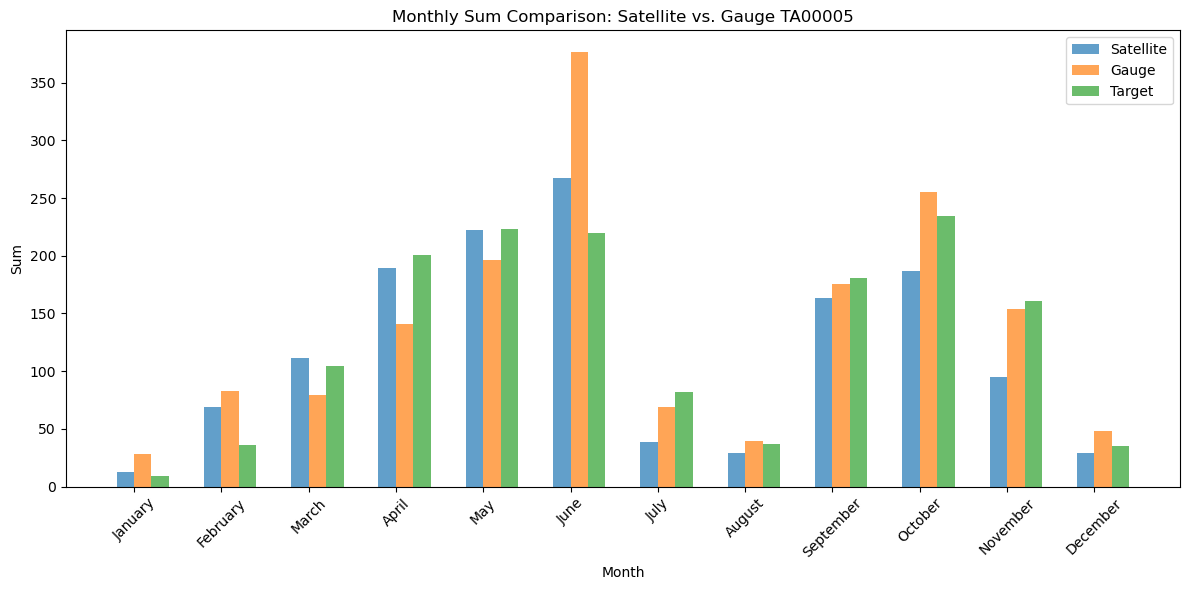

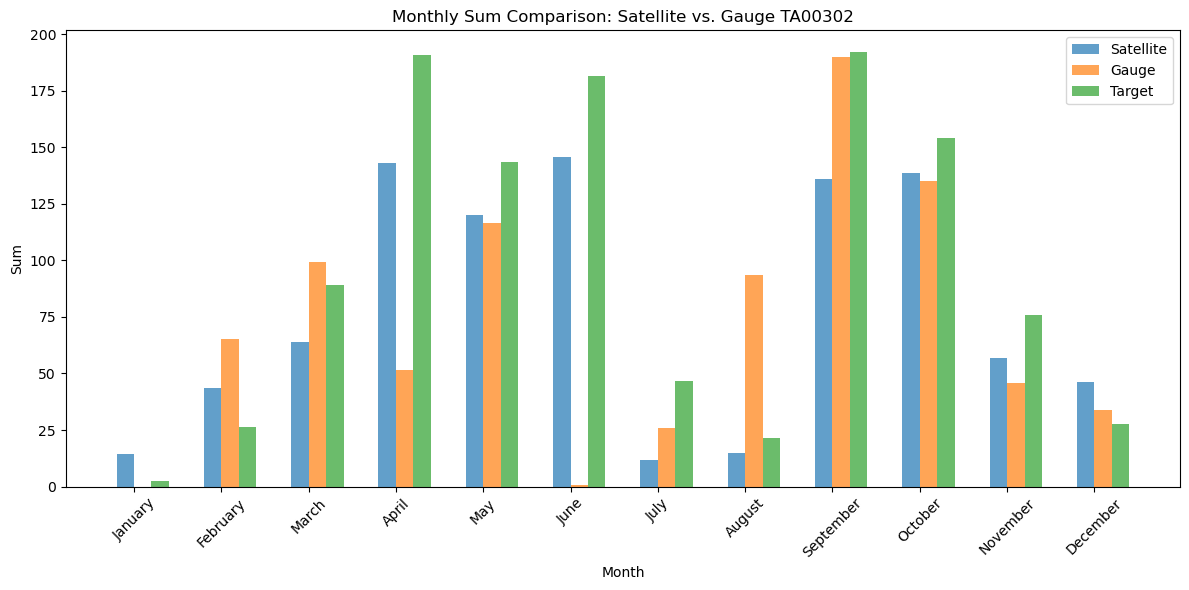

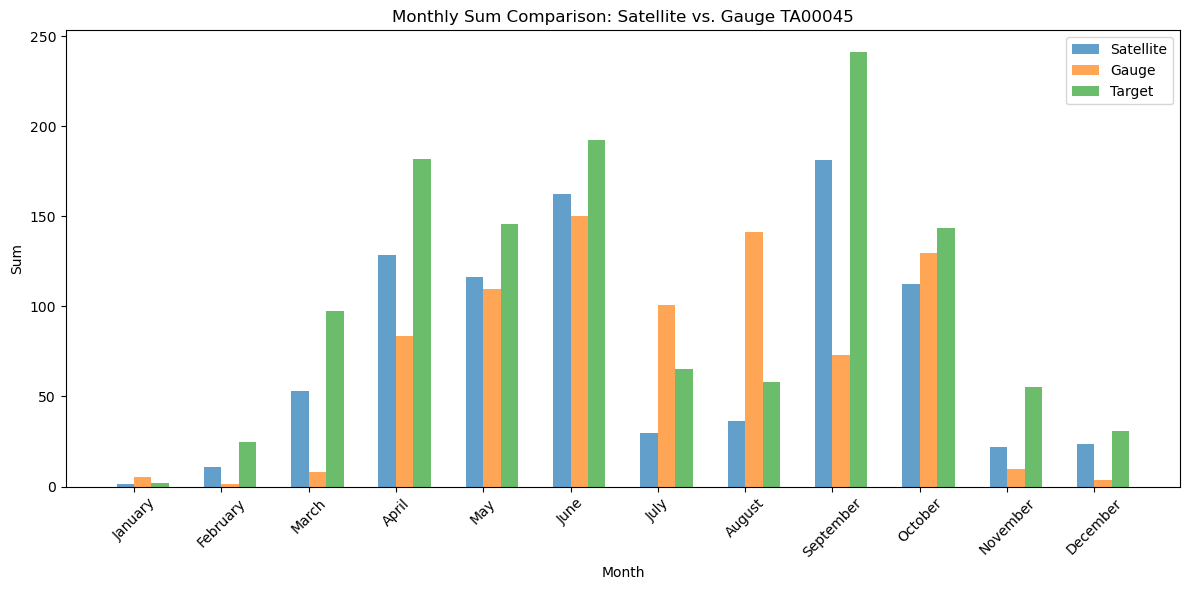

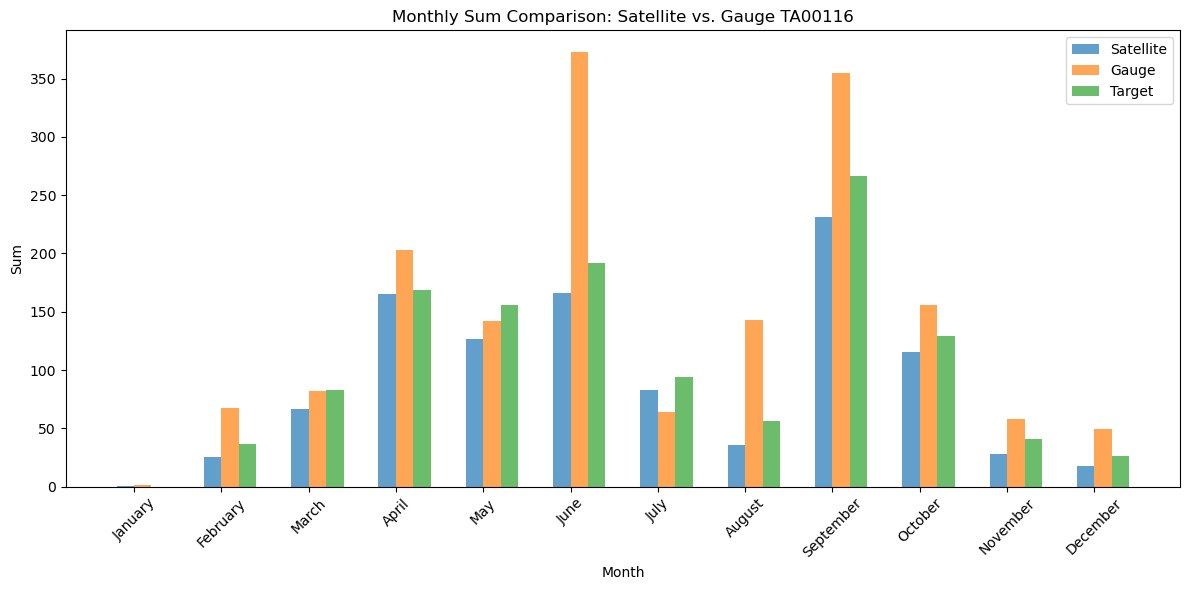

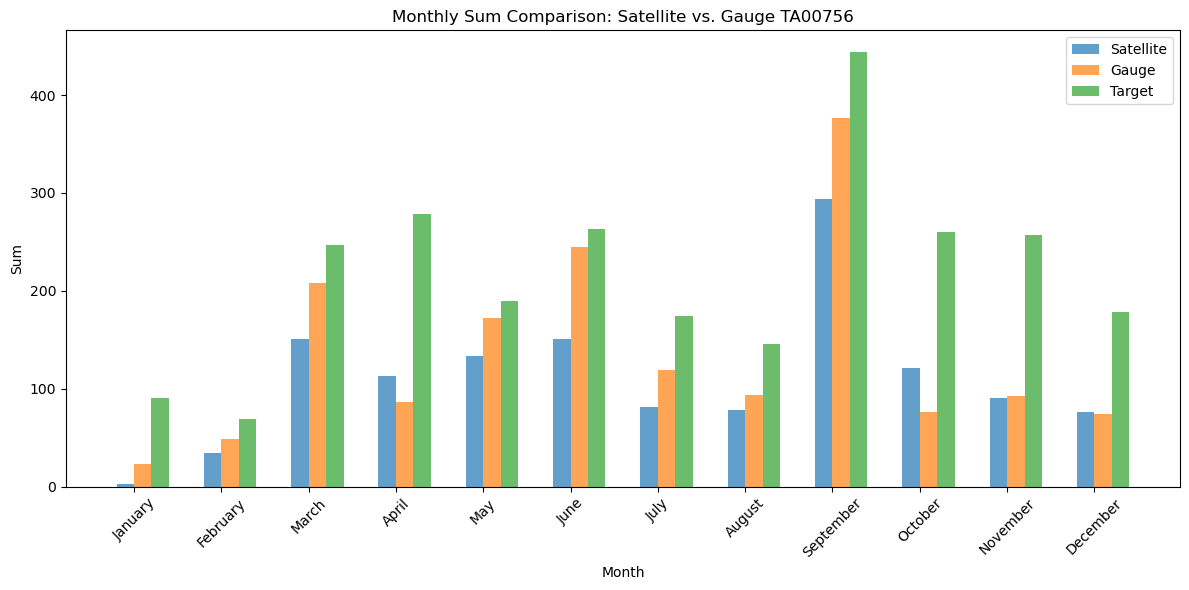

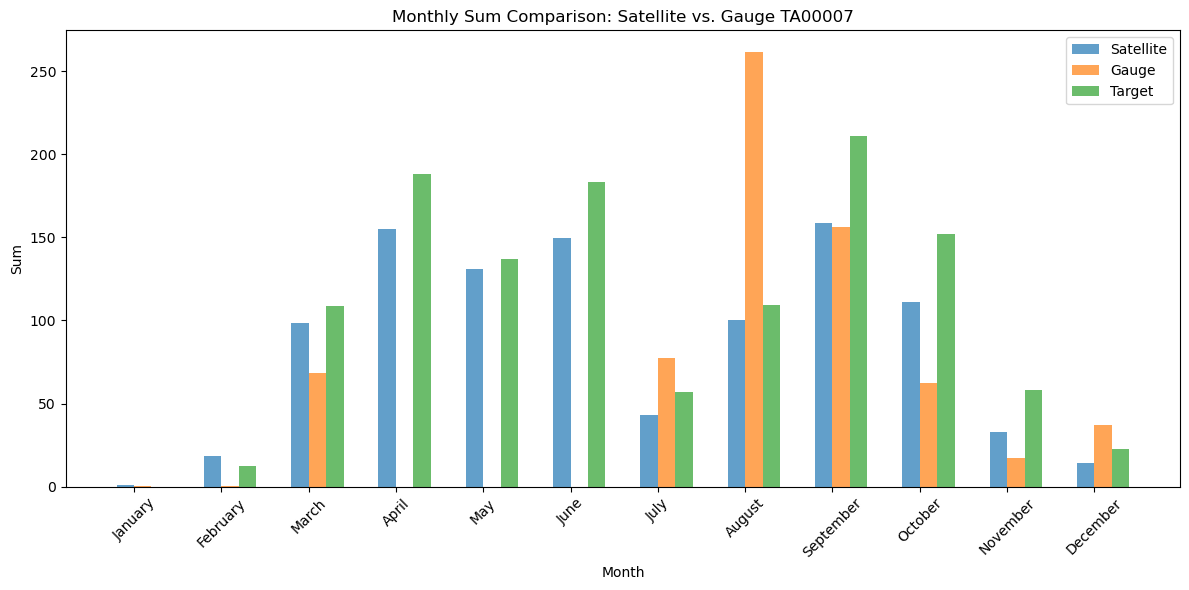

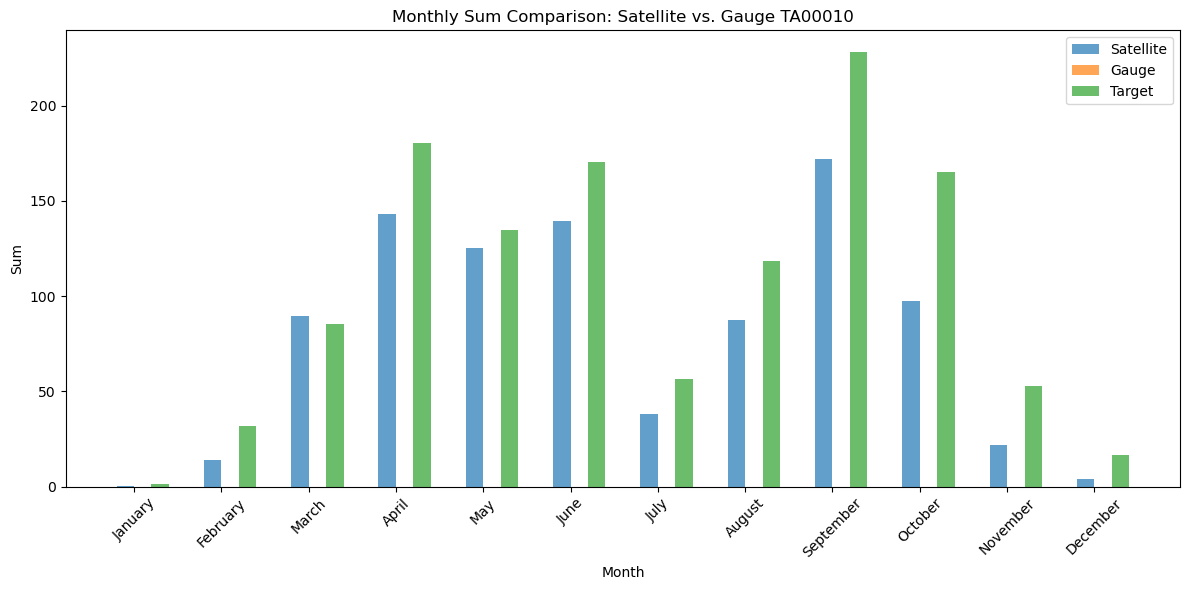

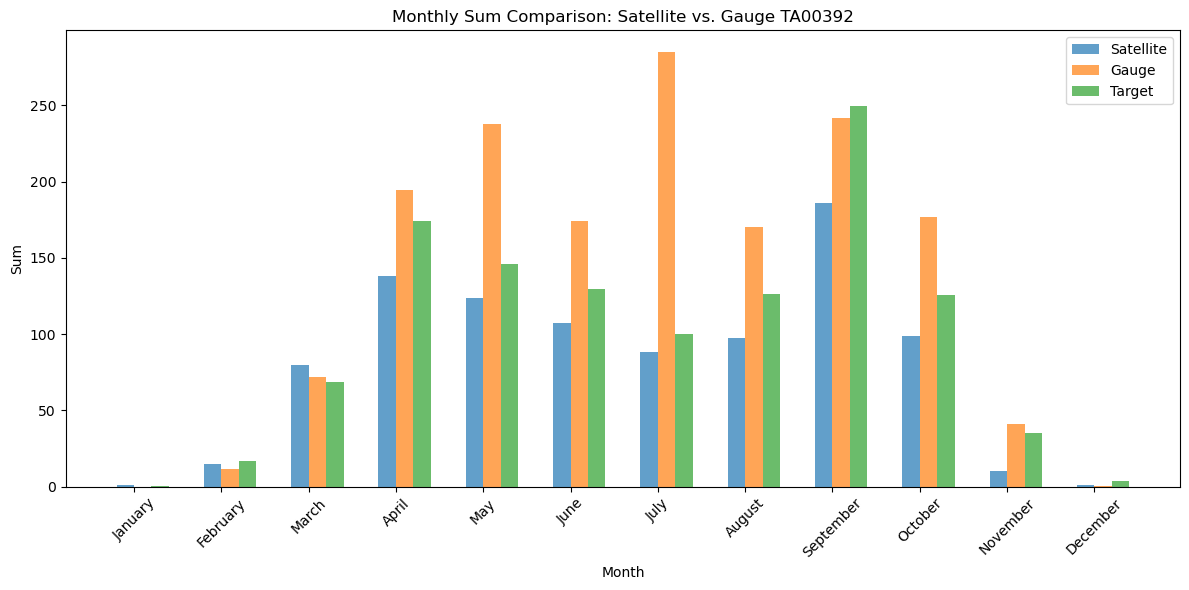

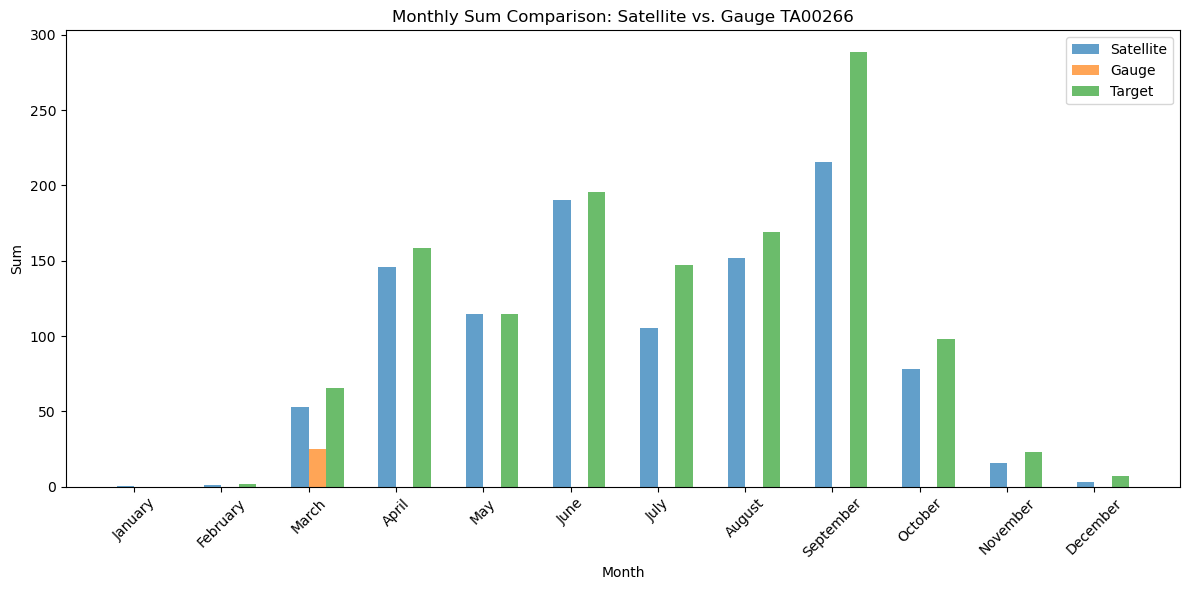

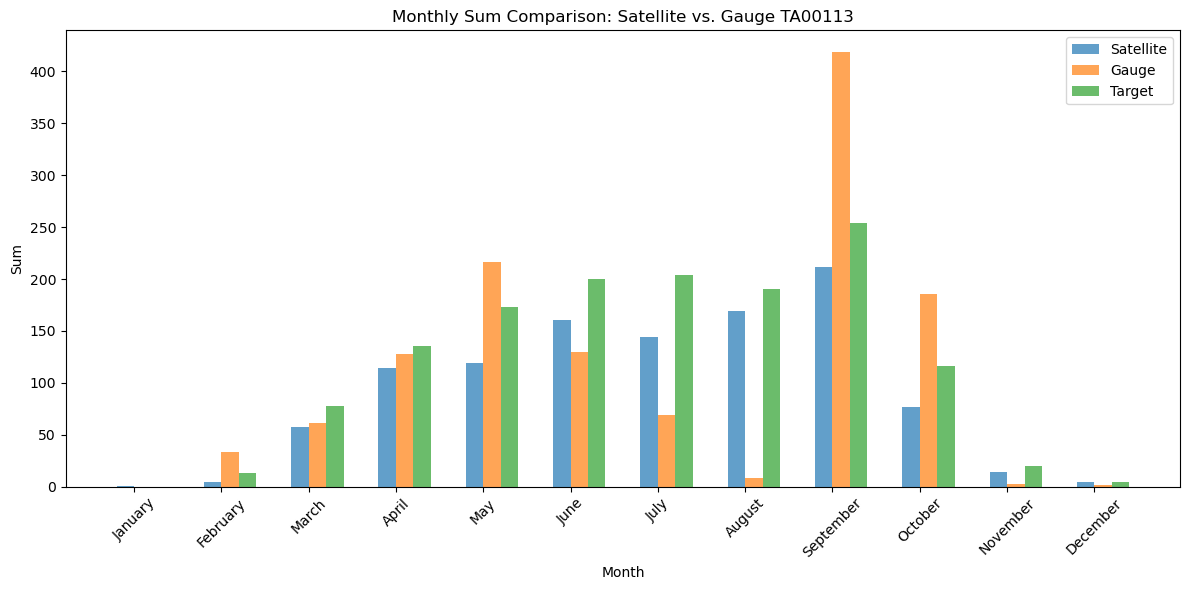

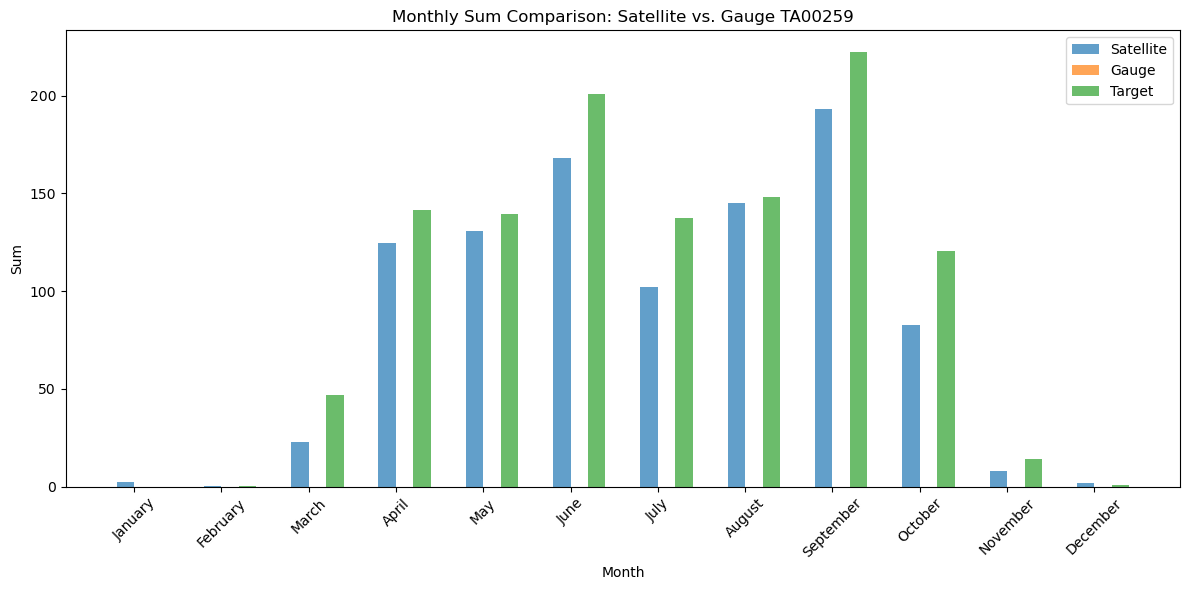

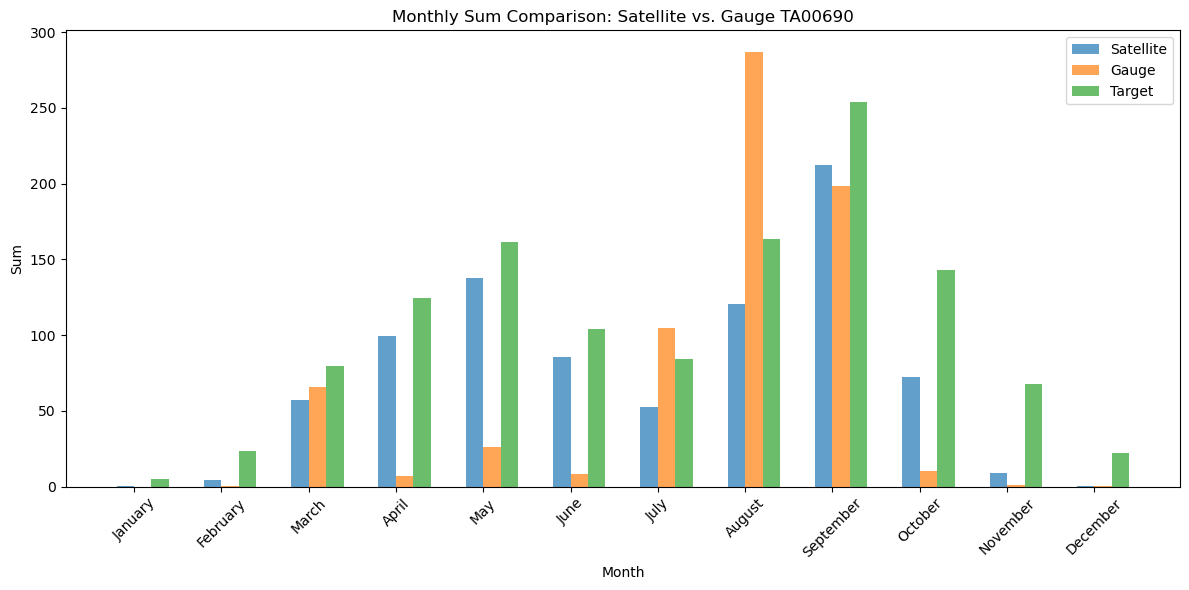

In [10]:
hist_plot(df_pred, combined_station_data, df_target, 'TA00005')
hist_plot(df_pred, combined_station_data, df_target, 'TA00302')
hist_plot(df_pred, combined_station_data, df_target, 'TA00045')
hist_plot(df_pred, combined_station_data, df_target, 'TA00116')
hist_plot(df_pred, combined_station_data, df_target, 'TA00756')
hist_plot(df_pred, combined_station_data, df_target, 'TA00007')
hist_plot(df_pred, combined_station_data, df_target, 'TA00010')
hist_plot(df_pred, combined_station_data, df_target, 'TA00392')
hist_plot(df_pred, combined_station_data, df_target, 'TA00266')
hist_plot(df_pred, combined_station_data, df_target, 'TA00113')
hist_plot(df_pred, combined_station_data, df_target, 'TA00259')
hist_plot(df_pred, combined_station_data, df_target, 'TA00690')

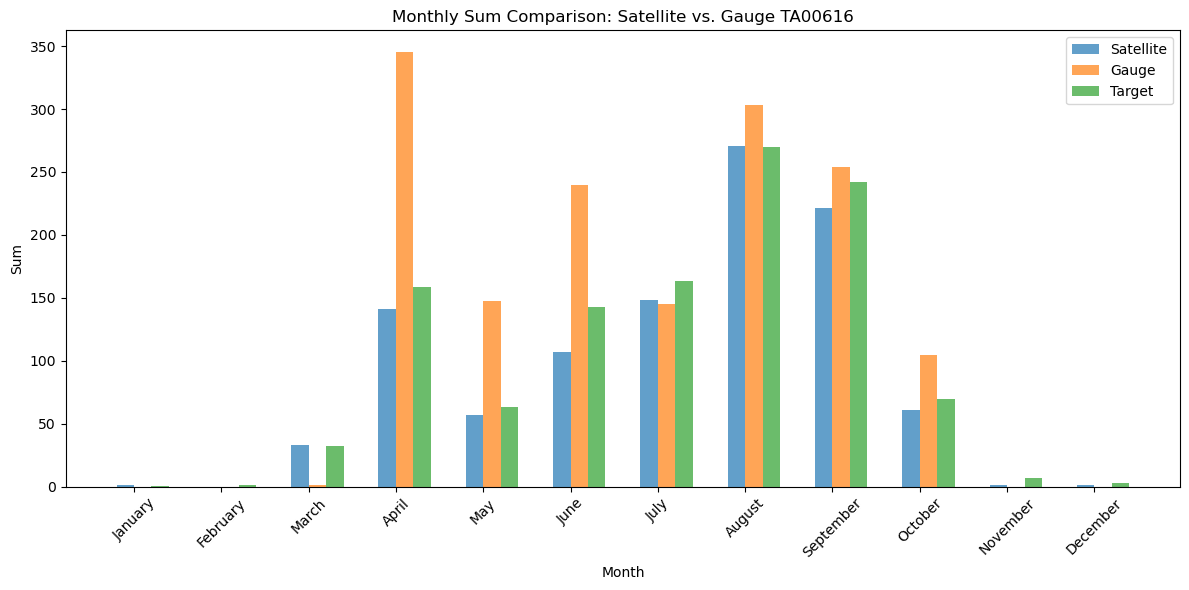

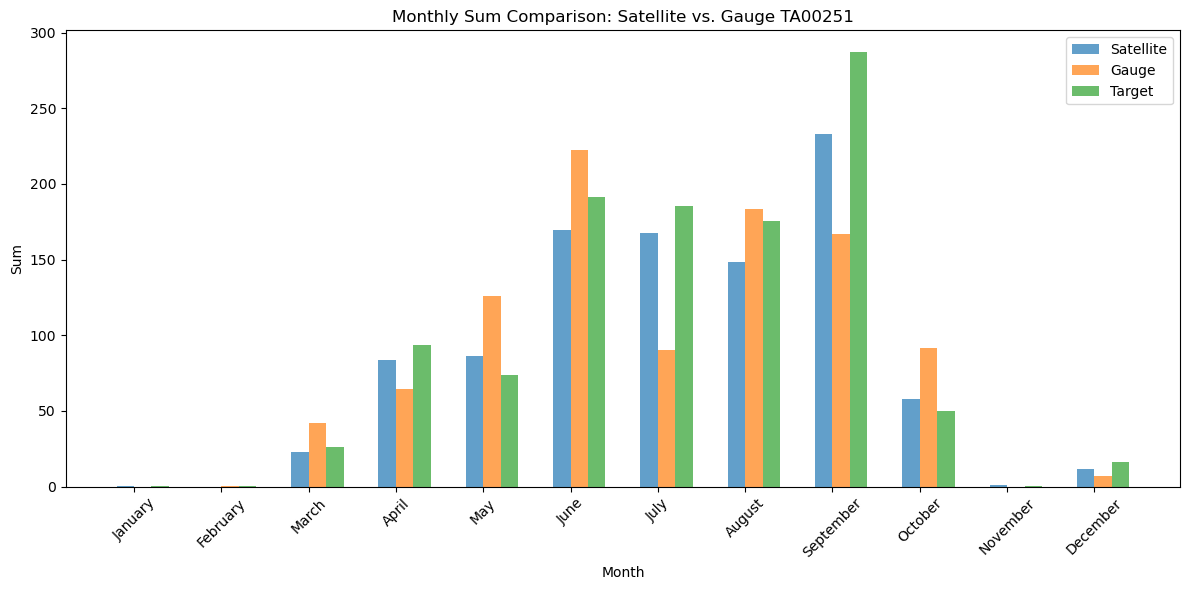

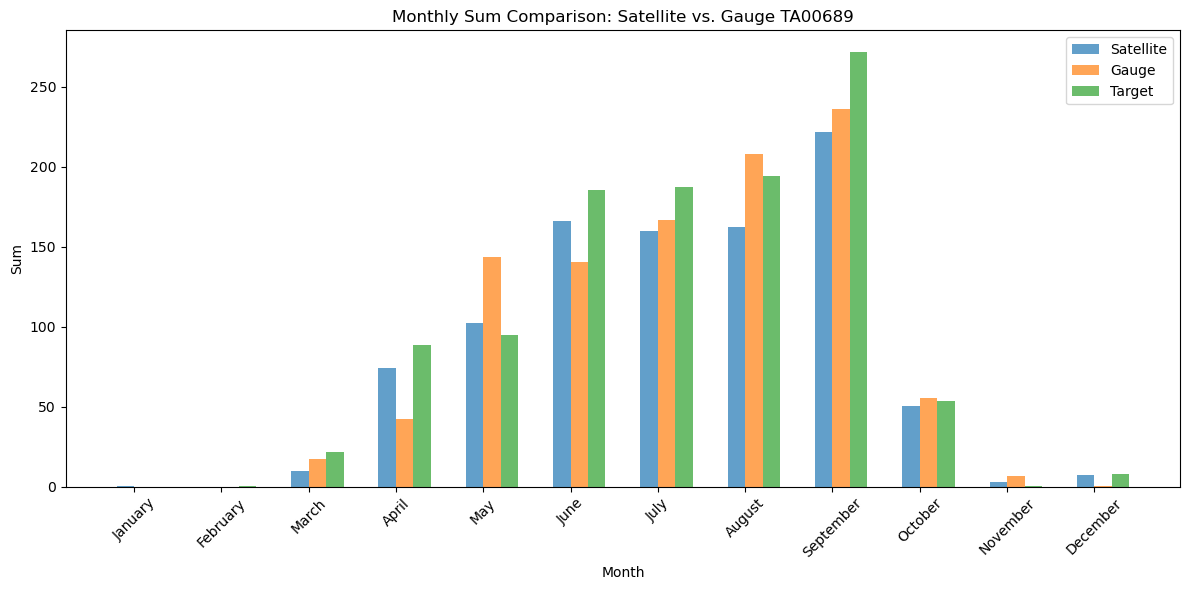

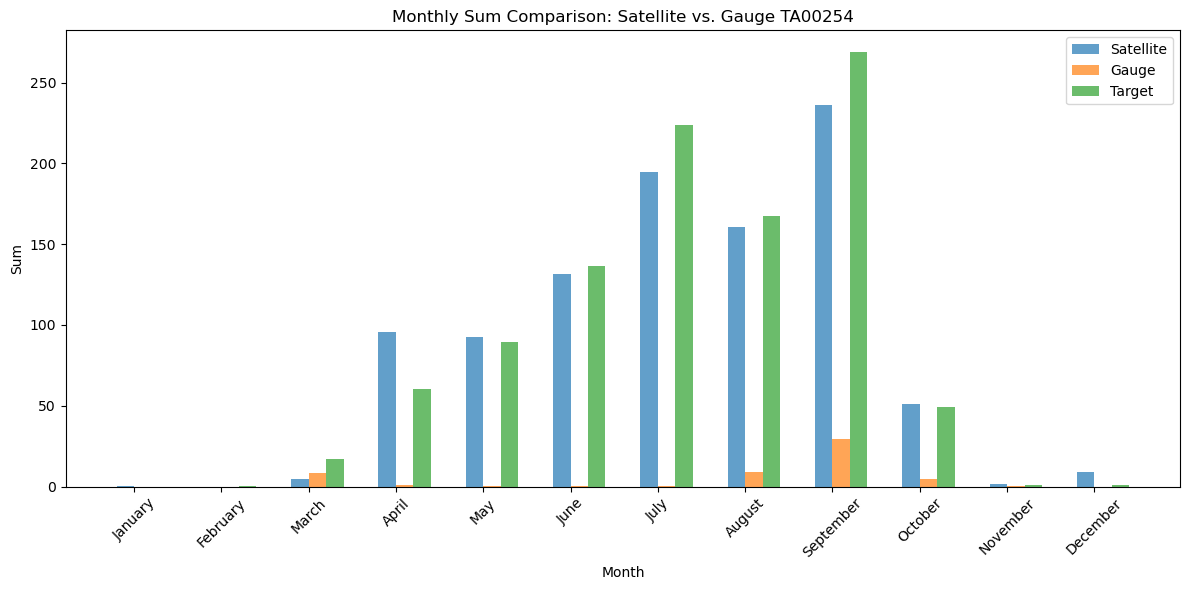

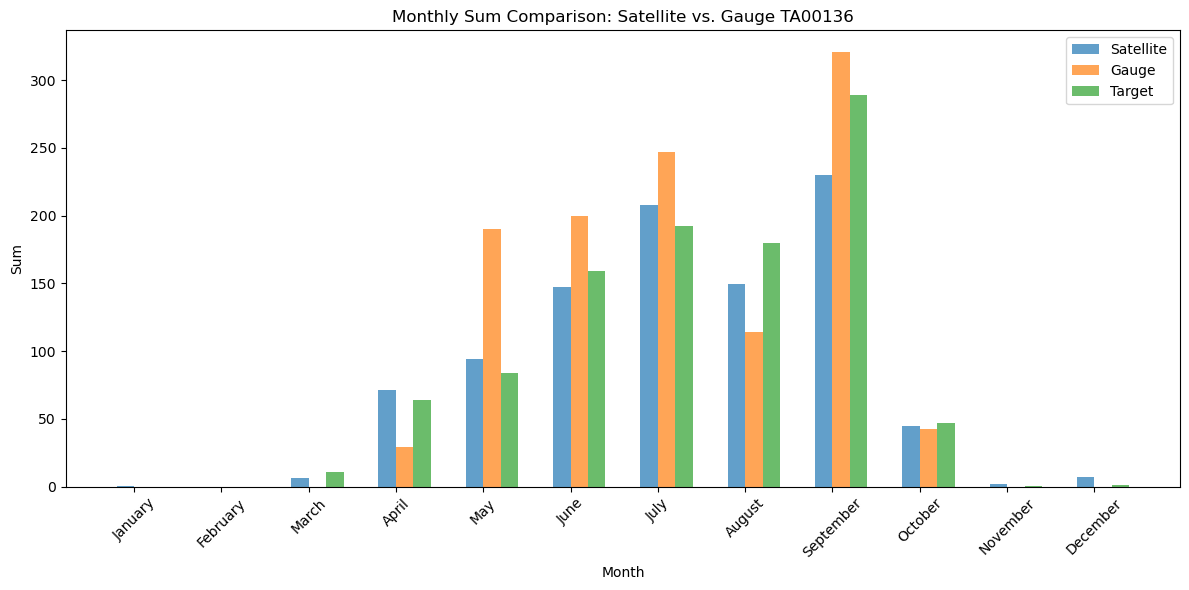

In [11]:
hist_plot(df_pred, combined_station_data, df_target, 'TA00616')
hist_plot(df_pred, combined_station_data, df_target, 'TA00251')
hist_plot(df_pred, combined_station_data, df_target, 'TA00689')
hist_plot(df_pred, combined_station_data, df_target, 'TA00254')
hist_plot(df_pred, combined_station_data, df_target, 'TA00136')